# Time Series: Forecasting Bitcoin price

In [1]:
# Importing TF and checking the version
import tensorflow as tf

print(tf.__version__)

2.10.1


### Importing time series with Pandas

In [2]:
# Reading Bitcoin data and parsing dates
import pandas as pd

df = pd.read_csv(
    "BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
    parse_dates=["Date"],
    index_col=["Date"]   
)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

In [6]:
# Separating closing prices for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


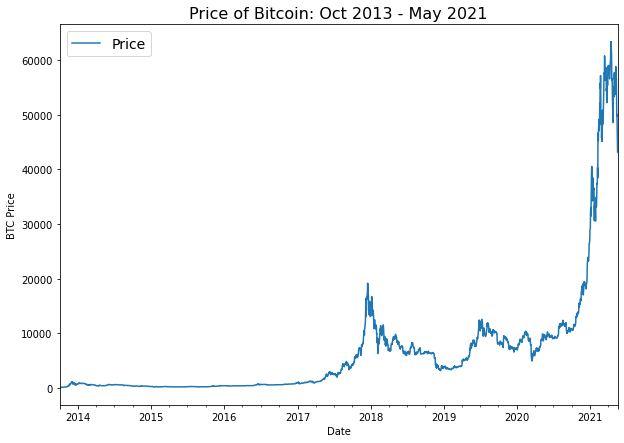

In [7]:
# Visualising Bitcoin prices
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin: Oct 2013 - May 2021", fontsize=16)
plt.legend(fontsize=14);

### Importing time series with Python

In [8]:
# Importing Bitcoin data with Python
import csv
from datetime import datetime

timestamps = []
btc_price = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader) # Skips first line to remove column names
    for line in csv_reader:
        timestamps.append(datetime.strptime(line[1], "%Y-%m-%d"))
        btc_price.append(float(line[2]))

# Viewing first 10 records
timestamps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of Bitcoin: Oct 2013 - May 2021')

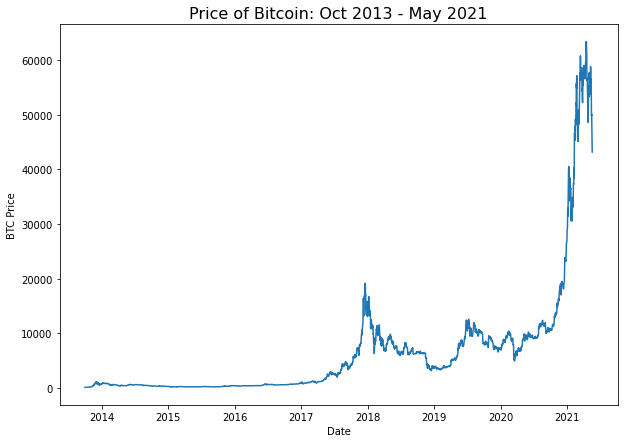

In [9]:
# Plotting from CSV
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(timestamps, btc_price)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin: Oct 2013 - May 2021", fontsize=16)
#plt.legend();

### Creating train and test data

In [10]:
# Get Bitcoin date array
timestamps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timestamps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to create train / test split for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    timestamps, # dates
    prices, # BTC prices
    test_size=0.2,
    random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

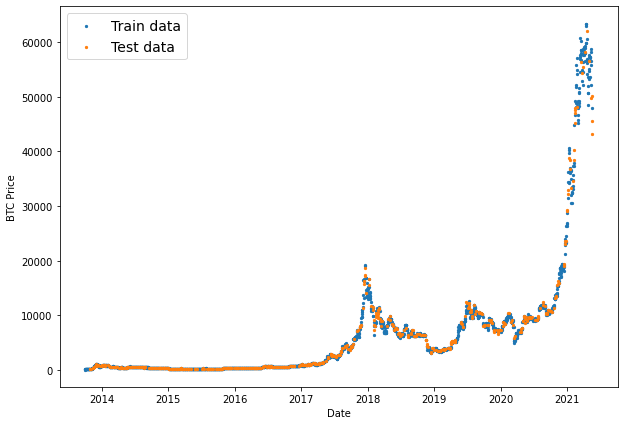

In [12]:
# Plotting the wrong data split results
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [13]:
# Right way to create train / test split for time series data
split_size = int(0.8 * len(prices)) # 80% - train, 20% - test

X_train, y_train = timestamps[:split_size], prices[:split_size]
X_test, y_test = timestamps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

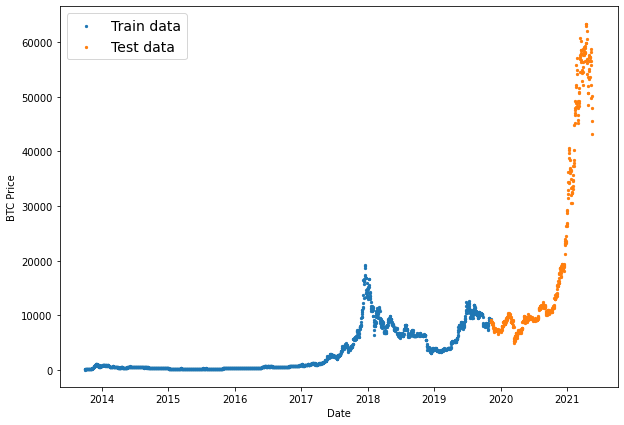

In [14]:
# Plotting the right data split results
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [15]:
# Creating plotting function
def plot_time_series(timestamps, values, marker=",", start=0, end=None, label=None):
    plt.plot(timestamps[start:end], values[start:end], marker=marker, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

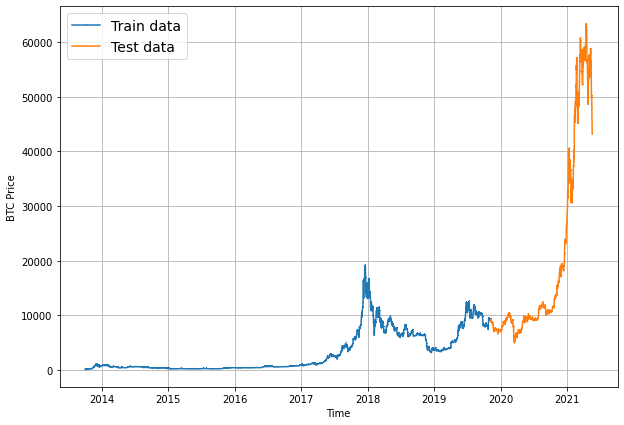

In [16]:
# Testing plot function
plt.figure(figsize=(10, 7))
plot_time_series(timestamps=X_train, values=y_train, label="Train data")
plot_time_series(timestamps=X_test, values=y_test, label="Test data")

### Model 0 - Naive forecast (baseline)

The prediction at timestamp t(y-hat) is equal to the value at timestamp t-1 (previous timestamp), i.e horizon of 1.
$$\hat{y}_{t} = y_{t-1}$$

In [17]:
# Creating naive forecast
naive_forecast = y_test[:-1]

print(f"First 10 values: {naive_forecast[:10]}\n")
print(f"Last 10 values: {naive_forecast[-10:]}")

First 10 values: [9226.48582088 8794.35864452 8798.04205463 9081.18687849 8711.53433917
 8760.89271814 8749.52059102 8656.97092235 8500.64355816 8469.2608989 ]

Last 10 values: [57107.12067189 58788.20967893 58102.19142623 55715.54665129
 56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361]


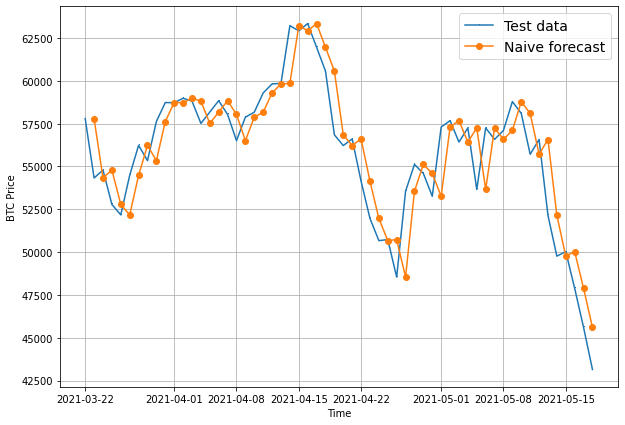

In [18]:
# Plotting naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timestamps=X_train, values=y_train, label="Train data")
plot_time_series(timestamps=X_test, values=y_test, start=500, label="Test data")
plot_time_series(timestamps=X_test[1:], values=naive_forecast, start=500, marker="o", label="Naive forecast")

In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of Naive Forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # Seasonality of 1 day

    return mae / mae_naive_no_season

In [20]:
# Verify if MASE of Naive Forecast is 1
mean_absolute_scaled_error(
    y_true=y_test[1:],
    y_pred=naive_forecast
)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182626>

In [21]:
# Function for evaluation matrix
def evaluate_preds(y_true, y_pred):

    # Ensuring that we use float32 dtype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculating various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [22]:
# Evaluating naive forecast results
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

### Windowing data

In [23]:
# We want to use Bitcoin prices of the week to predict next day price
print(f"Intention is to use {btc_price[:7]} to predict {btc_price[7]}")

Intention is to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict 123.033


In [24]:
# Setting up global variables for window size and horizon
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data

In [25]:
# Creating function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
    return x[:, :-horizon], x[:, -horizon:]

In [26]:
# Testing window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8) + 1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]])>)

In [27]:
# Creating function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):

    # 1. Creating window of specific window size
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

    # 2. Creating 2D array of multiple windows
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    # print(f"Windows indexes: {window_indexes} with shape of {window_indexes.shape}")

    # 3. Index on the target array (time series) with 2D of multiple window steps
    windowed_array = x[window_indexes]

    # 4. Get the labelled windows
    windows, labels = get_labelled_window(windowed_array, horizon=horizon)
    return windows, labels

In [28]:
# Testing the function
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [29]:
# Viewing the first 3 windows / labels
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [30]:
# Viewing the last 3 windows / labels
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


### Splitting windows into training and testing sets

In [31]:
# Creating function to make train / test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    split_size = int(len(windows) * (1 - test_split)) # Default 80% train / 20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [32]:
# Creating training and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    full_windows, full_labels
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [33]:
# Checking the first 5 train window values
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [34]:
# Checking the first test values
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

### Modelling checkpoint callback

In [35]:
# Function to implement ModelCheckpoint callback
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name),
        verbose=0,
        save_best_only=True
    )

### Model 1 - Dense model (window = 7, horizon = 1)

In [36]:
# Loading libraries
import tensorflow as tf
from tensorflow.keras import layers

# Setting random seed
tf.random.set_seed(42)

# Constructing a model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# Compiling the model
model_1.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

# Fitting the model
history_1 = model_1.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_1.name)]
)

Epoch 1/100
18/18 [==============================] - 2s 68ms/step - loss: 683.8516 - mae: 683.8516 - mse: 1879421.5000 - val_loss: 1203.4182 - val_mae: 1203.4182 - val_mse: 4791804.5000
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 250.8355 - mae: 250.8355 - mse: 274625.8125 - val_loss: 1238.7478 - val_mae: 1238.7478 - val_mse: 4985742.0000
Epoch 3/100
18/18 [==============================] - 1s 49ms/step - loss: 207.6935 - mae: 207.6935 - mse: 219156.7656 - val_loss: 1162.4052 - val_mae: 1162.4052 - val_mse: 4203302.0000
Epoch 4/100
18/18 [==============================] - 1s 36ms/step - loss: 197.7098 - mae: 197.7098 - mse: 204795.5000 - val_loss: 1132.8894 - val_mae: 1132.8894 - val_mse: 3987440.7500
Epoch 5/100
18/18 [==============================] - 1s 33ms/step - loss: 194.5558 - mae: 194.5558 - mse: 199934.6719 - val_loss: 1031.7549 - val_mae: 1031.7549 - val_mse: 3431326.5000
Epoch 6/100
18/18 [==============================] - 1s 34ms/step - loss: 1

In [37]:
# Evaluating the model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 674.4604 - mae: 674.4604 - mse: 1389632.8750


[674.46044921875, 674.46044921875, 1389632.875]

In [38]:
# Loading the best performing model_1 run and evaluating on test data
model_1_best = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9977 - mae: 568.9977 - mse: 1167039.1250


[568.9977416992188, 568.9977416992188, 1167039.125]

In [39]:
# Creating function to make predictions
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # 1D array of predictions

In [40]:
# Making predictions with the model 1
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8691.698, 8598.251, 8871.215, 8639.316, 8570.526, 8578.572,
        8545.68 , 8339.336, 8312.879, 8370.383], dtype=float32)>)

In [41]:
# Evaluting model 1 predictions
model_1_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_1_preds
)
model_1_results

{'mae': 674.4605,
 'mse': 1389633.1,
 'rmse': 1178.827,
 'mape': 3.1026707,
 'mase': 1.1848403}

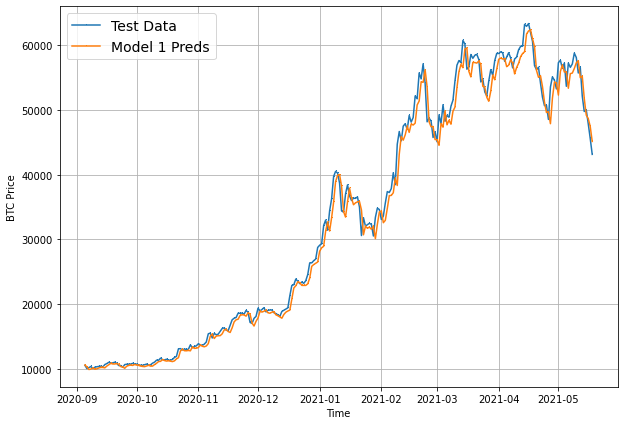

In [42]:
# Plotting model results
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, ],
    start=offset,
    label="Test Data"
)

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_1_preds,
    start=offset,
    label="Model 1 Preds"
)

### Model 2 - Dense model (window = 30, horizon = 1)

In [43]:
# Hyperparameters
HORIZON = 1
WINDOW_SIZE = 30

In [44]:
# Making windows data
full_windows, full_labels = make_windows(
    prices,
    window_size=WINDOW_SIZE,
    horizon=HORIZON
)
len(full_windows), len(full_labels)

(2757, 2757)

In [45]:
# Making train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows=full_windows,
    labels=full_labels,
    test_split=0.2
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [46]:
# Checking first 3 train windows
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [47]:
# Creating a model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense")

# Compiling the model
model_2.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fitting the model
history_2 = model_2.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_2.name)]
)

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [48]:
# Evaluating model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 621.9509 - mae: 621.9509


[621.9508666992188, 621.9508666992188]

In [49]:
# Loading the best model 2
model_2_best = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 621.9509 - mae: 621.9509


[621.9508666992188, 621.9508666992188]

In [50]:
# getting model 2 predictions
model_2_preds = make_preds(
    model_2,
    input_data=test_windows
)

18/18 [==============================] - 0s 2ms/step


In [51]:
# Evaluating results
model_2_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_2_preds
)
model_2_results

{'mae': 621.9508,
 'mse': 1324511.8,
 'rmse': 1150.8744,
 'mape': 2.7758489,
 'mase': 1.0871761}

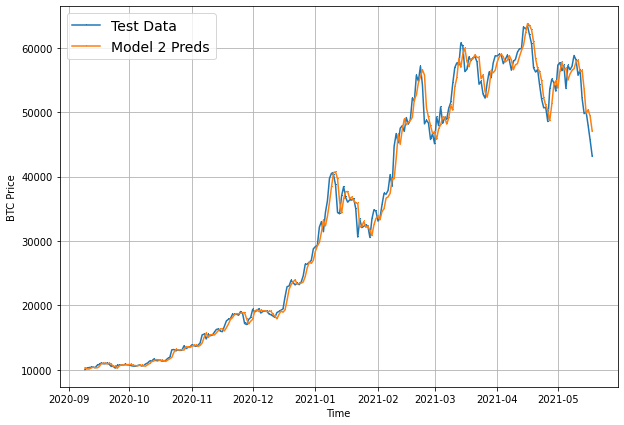

In [52]:
# Visualising model 2 results
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test Data"
)

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_2_preds,
    start=offset,
    label="Model 2 Preds"
)

### Model 3 - Dense model (window = 30, horizon = 7)

In [53]:
# Hyperparameters
HORIZON = 7
WINDOW_SIZE = 30

In [54]:
# Making windows data
full_windows, full_labels = make_windows(
    prices,
    window_size=WINDOW_SIZE,
    horizon=HORIZON
)
len(full_windows), len(full_labels)

(2751, 2751)

In [55]:
# Making train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows=full_windows,
    labels=full_labels,
    test_split=0.2
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [56]:
# Creating a model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

# Compiling the model
model_3.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fitting the model
history_3 = model_3.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_3.name)]
)

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: mod

In [57]:
# Evaluating model 3
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1390.6113 - mae: 1390.6113


[1390.611328125, 1390.611328125]

In [58]:
# Making predictions with model 3
model_3_preds = make_preds(
    model_3,
    input_data=test_windows
)
model_3_preds[:3]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9312.537, 9268.39 , 9380.624, 8943.677, 9010.117, 9069.338,
        9130.953],
       [8915.75 , 8828.667, 8926.609, 8687.788, 8631.364, 8939.183,
        8772.728],
       [8770.15 , 8663.169, 8734.705, 8735.183, 8673.245, 8847.873,
        8658.45 ]], dtype=float32)>

In [59]:
# Evaluating model 3 preds
model_3_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_3_preds
)
model_3_results

{'mae': array([ 366.16156 ,  190.12277 ,  136.0886  ,  244.51004 ,  173.63895 ,
         190.57707 ,  310.02832 ,  295.76443 ,  297.08572 ,  316.0568  ,
         488.76996 ,  512.53955 ,  587.0137  ,  580.49225 ,  310.6403  ,
         226.93185 ,  358.14258 ,  458.63715 ,  422.09988 ,  529.72986 ,
         212.05873 ,  196.73305 ,  103.261024,  145.0842  ,  215.50223 ,
         295.78754 ,  317.5611  ,  449.3208  ,  390.99023 ,  203.82484 ,
         159.22697 ,   68.712265,  107.29423 ,  123.150185,  216.04367 ,
         225.0131  ,  195.5143  ,  257.23737 ,  316.59695 ,  423.35812 ,
         729.25604 ,  257.5062  ,  212.62703 ,  286.20822 ,  170.64182 ,
         153.9384  ,  203.08629 ,  238.72252 ,  226.5577  ,  166.22664 ,
         201.09703 ,  183.01416 ,  146.9573  ,  279.4158  ,  399.78885 ,
         551.1188  ,  778.49524 ,  756.578   ,  705.16254 ,  825.3128  ,
         588.35785 ,  351.75217 ,  419.7583  ,  669.2245  ,  590.55084 ,
         584.0121  ,  727.4819  ,  793.7648 

In [60]:
# Function for evaluation matrix
# MAKING IT WORK FOR HIGHER HORIZON
def evaluate_preds(y_true, y_pred):

    # Ensuring that we use float32 dtype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculating various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Account for different size metrics
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [61]:
# Re-evaluating model 3 preds
model_3_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_3_preds
)
model_3_results

{'mae': 1390.6113,
 'mse': 6133210.0,
 'rmse': 1577.3613,
 'mape': 6.2030177,
 'mase': 2.474515}

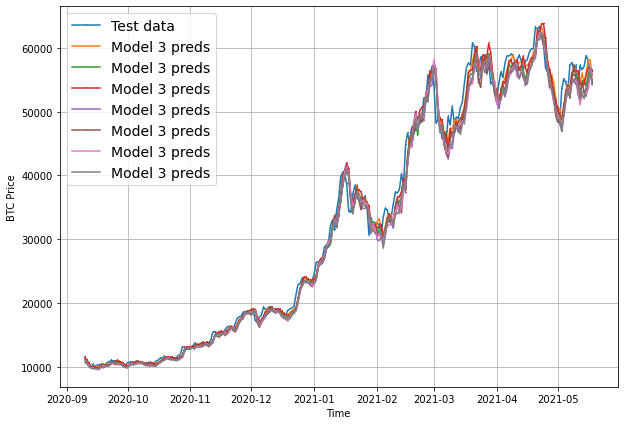

In [62]:
# Visualising the data
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test data"
)
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_3_preds,
    start=offset,
    label="Model 3 preds"
)

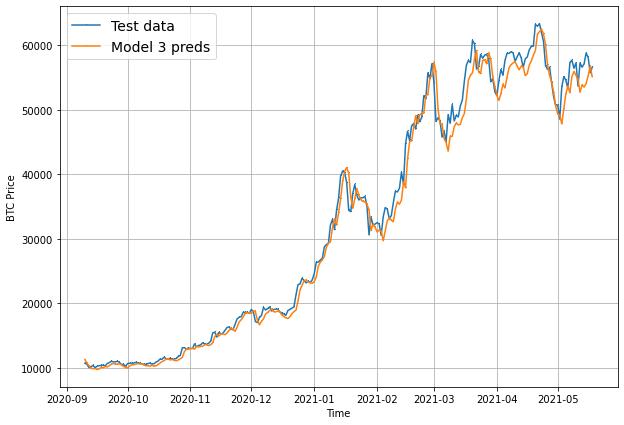

In [63]:
# Visualising the data
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test data"
)
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=tf.reduce_mean(model_3_preds, axis=1),
    start=offset,
    label="Model 3 preds"
)

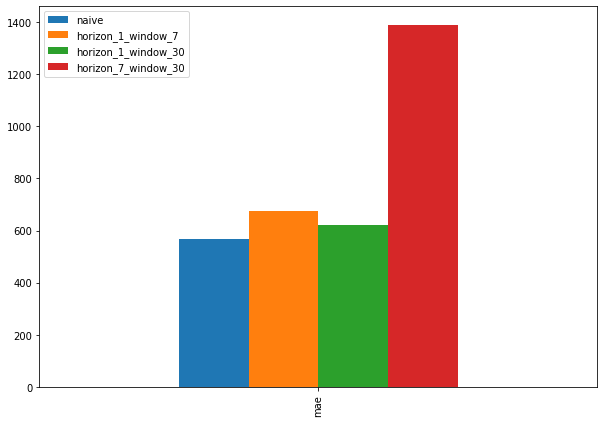

In [64]:
# Comparing models performance
pd.DataFrame({
    "naive": naive_results["mae"],
    "horizon_1_window_7": model_1_results["mae"],
    "horizon_1_window_30": model_2_results["mae"],
    "horizon_7_window_30": model_3_results["mae"]
}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4 - Using Conv1D

In [65]:
# Defining horizon and window
HORIZON = 1
WINDOW_SIZE = 7

In [66]:
# Creating windowed data
full_windows,full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [67]:
# Creating train / test datasets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [68]:
# Checking data input shape
train_windows[0].shape # returns WINDOW_SIZE

(7,)

In [69]:
# Conv1D expects input of (batch_size, timestamps, input_dim)

In [70]:
# Reshaping the tensor
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [71]:
# Creating Lambda layer
expand_dim_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [72]:
# Testing Lambda layer
print(f"Original shape: {x.shape}") # Output WINDOW_SIZE
print(f"Expanded shape: {expand_dim_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dim_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [73]:
# Creating Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_Conv1D")

# Compiling the model
model_4.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_4 = model_4.fit(
    train_windows,
    train_labels,
    batch_size=128,
    epochs=100,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_4.name)]
)

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 1927.4446 

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 78ms/step - loss: 1893.3192 - val_loss: 1634.8511
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 198.6396

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 58ms/step - loss: 332.7580 - val_loss: 1570.6257
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 207.2676

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 61ms/step - loss: 224.7741 - val_loss: 1053.6631
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 236.1791

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 73ms/step - loss: 189.1512 - val_loss: 1020.3878
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 184.0037 - val_loss: 1026.6226
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 140.7918

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 79ms/step - loss: 181.2381 - val_loss: 1005.6751
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 180.7918

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 78ms/step - loss: 180.7918 - val_loss: 984.4146
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 175.7115 - val_loss: 991.3198
Epoch 9/100
16/18 [=========================>....] - ETA: 0s - loss: 175.8259

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 92ms/step - loss: 172.5461 - val_loss: 980.3820
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 167.9690

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 65ms/step - loss: 170.4978 - val_loss: 958.1945
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 186.9573

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 63ms/step - loss: 168.0354 - val_loss: 920.3323
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 166.9031 - val_loss: 1011.4097
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 129.0079

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 66ms/step - loss: 163.0651 - val_loss: 898.3171
Epoch 14/100
15/18 [========================>.....] - ETA: 0s - loss: 156.2404

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 157.6646 - val_loss: 893.0358
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 156.7437 - val_loss: 918.2340
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 154.6000

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 152.9076 - val_loss: 844.9621
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 149.3104 - val_loss: 873.4805
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 148.8135

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 57ms/step - loss: 147.6680 - val_loss: 836.8954
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 82.5707

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 62ms/step - loss: 144.3254 - val_loss: 807.6570
Epoch 20/100
16/18 [=========================>....] - ETA: 0s - loss: 142.2625

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 142.9945 - val_loss: 797.5064
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 194.5770

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 46ms/step - loss: 141.5529 - val_loss: 764.1423
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 188.5090

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 66ms/step - loss: 139.0352 - val_loss: 758.7663
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 156.6166

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 41ms/step - loss: 135.0792 - val_loss: 752.7745
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 150.3170

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 46ms/step - loss: 135.0432 - val_loss: 738.1557
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 140.0062

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 60ms/step - loss: 135.8526 - val_loss: 721.5645
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 133.1485

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 68ms/step - loss: 130.4897 - val_loss: 712.6089
Epoch 27/100
15/18 [========================>.....] - ETA: 0s - loss: 129.3808

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 47ms/step - loss: 129.7990 - val_loss: 704.0527
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 133.2837

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 44ms/step - loss: 127.9258 - val_loss: 692.9260
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 127.5961 - val_loss: 713.0555
Epoch 30/100
18/18 [==============================] - 0s 3ms/step - loss: 130.0466 - val_loss: 817.3825
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 138.9933 - val_loss: 762.0102
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 124.5423

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 42ms/step - loss: 130.9362 - val_loss: 666.6470
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 128.8841 - val_loss: 682.5341
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 128.0944

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 43ms/step - loss: 123.1640 - val_loss: 655.9390
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 108.3011

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 55ms/step - loss: 121.1310 - val_loss: 653.2987
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 125.6940 - val_loss: 711.1445
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 155.3502

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 41ms/step - loss: 121.0665 - val_loss: 642.4099
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 108.3998

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 43ms/step - loss: 119.7561 - val_loss: 637.6141
Epoch 39/100
18/18 [==============================] - 0s 4ms/step - loss: 118.9303 - val_loss: 655.4014
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 118.4512 - val_loss: 640.7108
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 105.1078

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 45ms/step - loss: 118.8264 - val_loss: 634.9948
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 111.3590

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 44ms/step - loss: 121.4198 - val_loss: 623.0333
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 115.7104 - val_loss: 628.3295
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 70.5580

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 43ms/step - loss: 117.5235 - val_loss: 620.5363
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 118.4525 - val_loss: 631.6389
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 90.2682

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 44ms/step - loss: 117.7279 - val_loss: 614.2361
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 119.0682 - val_loss: 659.0334
Epoch 48/100
18/18 [==============================] - 0s 7ms/step - loss: 116.3454 - val_loss: 649.3118
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 116.7241 - val_loss: 617.0728
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 136.7938

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 44ms/step - loss: 114.5670 - val_loss: 611.6951
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 114.5209 - val_loss: 619.2477
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8264 - val_loss: 613.0349
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 62.0575

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 41ms/step - loss: 117.0059 - val_loss: 609.7211
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 113.9308 - val_loss: 612.8981
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 131.6013

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 48ms/step - loss: 115.3056 - val_loss: 601.2684
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 117.2629 - val_loss: 746.4962
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 138.9679 - val_loss: 610.0576
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 119.5932 - val_loss: 637.7065
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 80.0859

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 112.7483 - val_loss: 595.4193
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 112.2763 - val_loss: 604.5424
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 112.7843 - val_loss: 601.3557
Epoch 62/100
16/18 [=========================>....] - ETA: 0s - loss: 113.3403

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 79ms/step - loss: 111.2591 - val_loss: 591.3976
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 112.8492 - val_loss: 605.6402
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3062 - val_loss: 668.4282
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 118.4198 - val_loss: 595.3486
Epoch 66/100
18/18 [==============================] - ETA: 0s - loss: 112.9234

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 49ms/step - loss: 112.9234 - val_loss: 586.9622
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 110.6397 - val_loss: 645.3543
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 120.1537 - val_loss: 711.2708
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 125.1746 - val_loss: 651.8408
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 125.6030

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 42ms/step - loss: 120.9827 - val_loss: 586.8273
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5333 - val_loss: 613.0511
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 102.0504

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 38ms/step - loss: 111.2364 - val_loss: 583.0698
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2986 - val_loss: 647.8712
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0759 - val_loss: 587.0345
Epoch 75/100
 1/18 [>.............................] - ETA: 0s - loss: 128.6735

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 42ms/step - loss: 110.3555 - val_loss: 582.6287
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 79.0229

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 45ms/step - loss: 110.8067 - val_loss: 580.9826
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5928 - val_loss: 583.6812
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1358 - val_loss: 587.0390
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3389 - val_loss: 618.9035
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 110.3207 - val_loss: 581.2101
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 94.4858

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 39ms/step - loss: 110.0422 - val_loss: 578.3406
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 200.6352

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 41ms/step - loss: 115.9131 - val_loss: 577.0385
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4800 - val_loss: 678.7387
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 117.4948 - val_loss: 579.9047
Epoch 85/100
 1/18 [>.............................] - ETA: 0s - loss: 86.0147

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 45ms/step - loss: 110.7816 - val_loss: 575.6135
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 110.6788 - val_loss: 664.4830
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 114.5958 - val_loss: 594.7615
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 111.6068 - val_loss: 577.6628
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 111.8486 - val_loss: 582.8433
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 108.2831 - val_loss: 646.7047
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6812 - val_loss: 586.3099
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1607 - val_loss: 575.7801
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8008 - val_loss: 613.7475
Epoch 94/100
 1/18 [>.............................] - ETA: 0s - loss: 145.05

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 64ms/step - loss: 110.4190 - val_loss: 571.5877
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5258 - val_loss: 572.2812
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 117.3905 - val_loss: 583.4557
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 110.7729 - val_loss: 613.9491
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6220 - val_loss: 576.4976
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 110.4153 - val_loss: 578.3281
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4469 - val_loss: 656.7365


In [74]:
# Checking the model structure
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Evaluating the model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 656.7365


656.7365112304688

In [76]:
# Loading back the best performing model
model_4 = tf.keras.models.load_model("./model_experiments/model_4_Conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 571.5877


571.5877075195312

In [77]:
# Making predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8909.03 , 8791.549, 8996.06 , 8818.626, 8759.543, 8742.305,
       8687.628, 8559.424, 8466.753, 8523.552], dtype=float32)>

In [78]:
# Evaluating predictions
model_4_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_4_preds
)
model_4_results

{'mae': 571.58777,
 'mse': 1191810.0,
 'rmse': 1091.7006,
 'mape': 2.568006,
 'mase': 1.0041214}

### Model 5 - LSTM (RNN)

In [79]:
# Building LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name="module_5_LSTM")

# Compiling the model
model_5.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_5 = model_5.fit(
    train_windows,
    train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_5.name)]
)

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2602.9446 INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 3s 126ms/step - loss: 2531.7576 - val_loss: 11075.9258
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 797.5244 INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 116ms/step - loss: 724.6937 - val_loss: 1810.3639
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 255.4918INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 131ms/step - loss: 246.6729 - val_loss: 1386.1169
Epoch 4/100
13/18 [====================>.........] - ETA: 0s - loss: 202.6057INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 120ms/step - loss: 193.5238 - val_loss: 1078.4550
Epoch 5/100
14/18 [======================>.......] - ETA: 0s - loss: 195.3340INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 114ms/step - loss: 189.0231 - val_loss: 1057.0192
Epoch 6/100
13/18 [====================>.........] - ETA: 0s - loss: 182.5441INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 127ms/step - loss: 186.3530 - val_loss: 1041.5302
Epoch 7/100
13/18 [====================>.........] - ETA: 0s - loss: 195.5686INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 112ms/step - loss: 186.9431 - val_loss: 1035.5787
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 182.5478 - val_loss: 1037.7795
Epoch 9/100
14/18 [======================>.......] - ETA: 0s - loss: 176.9019INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 117ms/step - loss: 181.2574 - val_loss: 1030.9187
Epoch 10/100
13/18 [====================>.........] - ETA: 0s - loss: 173.1948INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 121ms/step - loss: 179.1294 - val_loss: 1007.4021
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 174.2797INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 129ms/step - loss: 173.7916 - val_loss: 901.0160
Epoch 12/100
18/18 [==============================] - 0s 12ms/step - loss: 170.4188 - val_loss: 1013.1167
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 172.4391INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 122ms/step - loss: 171.3450 - val_loss: 885.9061
Epoch 14/100
18/18 [==============================] - 0s 8ms/step - loss: 177.1355 - val_loss: 1273.8547
Epoch 15/100
18/18 [==============================] - 0s 13ms/step - loss: 178.0384 - val_loss: 1087.4310
Epoch 16/100
18/18 [==============================] - 0s 10ms/step - loss: 164.9814 - val_loss: 932.4640
Epoch 17/100
18/18 [==============================] - 0s 12ms/step - loss: 161.5172 - val_loss: 921.9357
Epoch 18/100
18/18 [==============================] - 0s 15ms/step - loss: 159.1573 - val_loss: 1031.2363
Epoch 19/100
18/18 [==============================] - 0s 16ms/step - loss: 165.5811 - val_loss: 973.4691
Epoch 20/100
18/18 [==============================] - 0s 9ms/step - loss: 164.6919 - val_loss: 916.0710
Epoch 21/100
18/18 [==============================] - 0s 11ms/step - loss: 162.0108 - val_loss: 920.3685
Epoch 22/100
18/18 [==============================] - 0s 11ms/step

INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 125ms/step - loss: 156.4988 - val_loss: 884.3205
Epoch 25/100
18/18 [==============================] - 0s 7ms/step - loss: 154.6152 - val_loss: 886.8972
Epoch 26/100
13/18 [====================>.........] - ETA: 0s - loss: 150.7516INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 102ms/step - loss: 152.9616 - val_loss: 859.9526
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 157.7543INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 117ms/step - loss: 150.7427 - val_loss: 842.1392
Epoch 28/100
11/18 [=================>............] - ETA: 0s - loss: 151.4076INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 108ms/step - loss: 149.0834 - val_loss: 828.1029
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 148.0283 - val_loss: 831.1262
Epoch 30/100
18/18 [==============================] - 0s 8ms/step - loss: 148.6557 - val_loss: 852.2319
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 144.8164INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 119ms/step - loss: 144.7837 - val_loss: 796.1190
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 143.2478INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 113ms/step - loss: 142.2393 - val_loss: 794.8445
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 142.1080 - val_loss: 800.6511
Epoch 34/100
11/18 [=================>............] - ETA: 0s - loss: 147.2498INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 128ms/step - loss: 141.9214 - val_loss: 769.8318
Epoch 35/100
18/18 [==============================] - 0s 9ms/step - loss: 138.5533 - val_loss: 772.8290
Epoch 36/100
14/18 [======================>.......] - ETA: 0s - loss: 139.0125INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 105ms/step - loss: 139.2614 - val_loss: 759.1877
Epoch 37/100
12/18 [===================>..........] - ETA: 0s - loss: 131.8286INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 114ms/step - loss: 135.2524 - val_loss: 758.0053
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 133.6343INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 120ms/step - loss: 133.6343 - val_loss: 738.9928
Epoch 39/100
18/18 [==============================] - 0s 8ms/step - loss: 132.6253 - val_loss: 743.9637
Epoch 40/100
18/18 [==============================] - 0s 11ms/step - loss: 133.3314 - val_loss: 757.6265
Epoch 41/100
16/18 [=========================>....] - ETA: 0s - loss: 133.0952INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 126ms/step - loss: 131.3005 - val_loss: 717.9510
Epoch 42/100
17/18 [===========================>..] - ETA: 0s - loss: 130.1588INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 125ms/step - loss: 129.0176 - val_loss: 714.0879
Epoch 43/100
11/18 [=================>............] - ETA: 0s - loss: 121.9776INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 128.5240 - val_loss: 706.8231
Epoch 44/100
16/18 [=========================>....] - ETA: 0s - loss: 128.3586INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 119ms/step - loss: 127.3028 - val_loss: 699.5898
Epoch 45/100
13/18 [====================>.........] - ETA: 0s - loss: 122.4456INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 108ms/step - loss: 125.2051 - val_loss: 693.5620
Epoch 46/100
16/18 [=========================>....] - ETA: 0s - loss: 128.6579INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 109ms/step - loss: 127.5853 - val_loss: 688.7383
Epoch 47/100
18/18 [==============================] - 0s 9ms/step - loss: 125.1106 - val_loss: 695.8835
Epoch 48/100
16/18 [=========================>....] - ETA: 0s - loss: 124.2127INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 119ms/step - loss: 125.5419 - val_loss: 677.8220
Epoch 49/100
15/18 [========================>.....] - ETA: 0s - loss: 121.9394INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 123ms/step - loss: 122.9805 - val_loss: 676.5374
Epoch 50/100
17/18 [===========================>..] - ETA: 0s - loss: 124.2753INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 112ms/step - loss: 124.0639 - val_loss: 673.0927
Epoch 51/100
18/18 [==============================] - 0s 10ms/step - loss: 121.5596 - val_loss: 721.3981
Epoch 52/100
14/18 [======================>.......] - ETA: 0s - loss: 127.8534INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 116ms/step - loss: 122.8828 - val_loss: 659.3317
Epoch 53/100
10/18 [===============>..............] - ETA: 0s - loss: 116.2902INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 120.3495 - val_loss: 657.8426
Epoch 54/100
18/18 [==============================] - 0s 11ms/step - loss: 120.4314 - val_loss: 667.9616
Epoch 55/100
18/18 [==============================] - ETA: 0s - loss: 120.2031INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 135ms/step - loss: 120.2031 - val_loss: 647.9774
Epoch 56/100
11/18 [=================>............] - ETA: 0s - loss: 123.0372INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 111ms/step - loss: 122.7906 - val_loss: 643.7766
Epoch 57/100
18/18 [==============================] - 0s 10ms/step - loss: 124.8174 - val_loss: 661.6835
Epoch 58/100
14/18 [======================>.......] - ETA: 0s - loss: 118.1374INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 116ms/step - loss: 118.4460 - val_loss: 639.6356
Epoch 59/100
18/18 [==============================] - 0s 11ms/step - loss: 118.0138 - val_loss: 651.9592
Epoch 60/100
17/18 [===========================>..] - ETA: 0s - loss: 119.0346INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 136ms/step - loss: 120.3947 - val_loss: 636.5228
Epoch 61/100
18/18 [==============================] - 0s 9ms/step - loss: 119.1074 - val_loss: 681.3274
Epoch 62/100
18/18 [==============================] - 0s 11ms/step - loss: 118.7287 - val_loss: 656.1204
Epoch 63/100
18/18 [==============================] - ETA: 0s - loss: 122.7615INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 105ms/step - loss: 122.7615 - val_loss: 631.7227
Epoch 64/100
18/18 [==============================] - 0s 8ms/step - loss: 115.7738 - val_loss: 642.0335
Epoch 65/100
15/18 [========================>.....] - ETA: 0s - loss: 115.1362INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 122ms/step - loss: 116.6353 - val_loss: 623.5441
Epoch 66/100
18/18 [==============================] - 0s 9ms/step - loss: 115.3449 - val_loss: 638.9009
Epoch 67/100
15/18 [========================>.....] - ETA: 0s - loss: 115.6607INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 118ms/step - loss: 117.2193 - val_loss: 618.8455
Epoch 68/100
18/18 [==============================] - 0s 11ms/step - loss: 117.6696 - val_loss: 619.3381
Epoch 69/100
18/18 [==============================] - 0s 14ms/step - loss: 118.8645 - val_loss: 629.8202
Epoch 70/100
18/18 [==============================] - 0s 15ms/step - loss: 120.5112 - val_loss: 643.7797
Epoch 71/100
18/18 [==============================] - 0s 17ms/step - loss: 116.3014 - val_loss: 653.5784
Epoch 72/100
18/18 [==============================] - 0s 16ms/step - loss: 117.9328 - val_loss: 619.3658
Epoch 73/100
18/18 [==============================] - 0s 17ms/step - loss: 116.4131 - val_loss: 659.0582
Epoch 74/100
15/18 [========================>.....] - ETA: 0s - loss: 114.7337INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 134ms/step - loss: 115.3483 - val_loss: 616.6680
Epoch 75/100
18/18 [==============================] - 0s 10ms/step - loss: 114.3990 - val_loss: 628.9370
Epoch 76/100
17/18 [===========================>..] - ETA: 0s - loss: 113.3213INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 113.7061 - val_loss: 613.4252
Epoch 77/100
18/18 [==============================] - 0s 9ms/step - loss: 116.8364 - val_loss: 692.4202
Epoch 78/100
18/18 [==============================] - 0s 11ms/step - loss: 117.2451 - val_loss: 614.5787
Epoch 79/100
10/18 [===============>..............] - ETA: 0s - loss: 110.7759INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 111ms/step - loss: 113.4636 - val_loss: 602.2130
Epoch 80/100
18/18 [==============================] - 0s 8ms/step - loss: 112.6209 - val_loss: 633.2037
Epoch 81/100
18/18 [==============================] - 0s 10ms/step - loss: 113.0831 - val_loss: 637.8539
Epoch 82/100
18/18 [==============================] - 0s 17ms/step - loss: 115.6435 - val_loss: 607.3579
Epoch 83/100
18/18 [==============================] - 0s 16ms/step - loss: 112.2910 - val_loss: 639.9598
Epoch 84/100
18/18 [==============================] - 0s 18ms/step - loss: 114.5732 - val_loss: 604.0402
Epoch 85/100
18/18 [==============================] - 0s 17ms/step - loss: 113.4933 - val_loss: 645.1058
Epoch 86/100
18/18 [==============================] - 0s 16ms/step - loss: 115.0457 - val_loss: 604.0005
Epoch 87/100
14/18 [======================>.......] - ETA: 0s - loss: 116.7659INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 115ms/step - loss: 113.2326 - val_loss: 594.0002
Epoch 88/100
18/18 [==============================] - 0s 9ms/step - loss: 112.3552 - val_loss: 598.6922
Epoch 89/100
18/18 [==============================] - 0s 9ms/step - loss: 112.6094 - val_loss: 626.1469
Epoch 90/100
18/18 [==============================] - 0s 15ms/step - loss: 115.5938 - val_loss: 662.7798
Epoch 91/100
18/18 [==============================] - 0s 15ms/step - loss: 114.5046 - val_loss: 604.8611
Epoch 92/100
14/18 [======================>.......] - ETA: 0s - loss: 112.7756INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 135ms/step - loss: 111.8154 - val_loss: 592.6922
Epoch 93/100
18/18 [==============================] - 0s 10ms/step - loss: 112.1577 - val_loss: 605.1108
Epoch 94/100
18/18 [==============================] - 0s 17ms/step - loss: 111.2441 - val_loss: 594.5757
Epoch 95/100
17/18 [===========================>..] - ETA: 0s - loss: 109.9092INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 128ms/step - loss: 110.5705 - val_loss: 588.2604
Epoch 96/100
18/18 [==============================] - 0s 11ms/step - loss: 112.3625 - val_loss: 593.3422
Epoch 97/100
18/18 [==============================] - 0s 15ms/step - loss: 110.9737 - val_loss: 628.7688
Epoch 98/100
18/18 [==============================] - 0s 19ms/step - loss: 112.1900 - val_loss: 589.9688
Epoch 99/100
17/18 [===========================>..] - ETA: 0s - loss: 110.5428INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 117ms/step - loss: 109.9981 - val_loss: 585.7945
Epoch 100/100
17/18 [===========================>..] - ETA: 0s - loss: 111.9817INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 111.7685 - val_loss: 585.4333


In [80]:
# Loading the best version
model_5 = tf.keras.models.load_model("model_experiments/module_5_LSTM/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.4333


585.4332885742188

In [81]:
# Making predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8953.303 ,  8829.244 ,  8997.041 ,  8823.71  ,  8745.884 ,
        8742.208 ,  8714.908 ,  8577.426 ,  8470.33  ,  8536.333 ,
        8315.621 ,  8150.757 ,  8085.8057,  7755.156 ,  7362.979 ,
        7251.5347,  7090.7563,  7129.3887,  7112.292 ,  7398.3564,
        7450.9756,  7654.6904,  7652.625 ,  7481.107 ,  7406.293 ,
        7337.877 ,  7274.762 ,  7335.8604,  7481.666 ,  7550.122 ,
        7577.551 ,  7433.586 ,  7316.088 ,  7235.9883,  7202.837 ,
        7228.2256,  7128.1235,  7117.957 ,  6966.657 ,  6688.6533,
        7179.1655,  7224.247 ,  7173.2607,  7259.5522,  7292.1406,
        7274.395 ,  7218.782 ,  7247.8   ,  7225.5215,  7231.755 ,
        7307.1016,  7394.257 ,  7318.9673,  7232.5566,  7207.078 ,
        7046.15  ,  7206.296 ,  7324.308 ,  7366.67  ,  7635.8296,
        7979.294 ,  8141.254 ,  7953.4375,  8073.8657,  8156.1274,
        8185.676 ,  8154.628 ,  8577.78  ,  8874.428 ,  8813.145 ,
        8933.6

In [82]:
# Evaluating predictions
model_5_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_5_preds
)
model_5_results

{'mae': 585.4332,
 'mse': 1240529.0,
 'rmse': 1113.7904,
 'mape': 2.6367705,
 'mase': 1.028444}

In [83]:
# Adding Blockchain halving events
block_reward_1 = 50 # 3 January 2009
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Adding block reward dates
block_reward_2_datetime = np.datetime64("2012-11-08")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")


In [84]:
# Creating date ranges
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2421)

In [85]:
# Adding in block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Adding in block_reward values
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [86]:
# Check top 5 values
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [87]:
# Checking 5 mid values
bitcoin_prices_block[1500:1505]

,Price,block_reward
Date,,
2017-11-09,7342.82375,12.5
2017-11-10,7250.77000,12.5
2017-11-11,6773.69500,12.5
2017-11-12,6075.30125,12.5
2017-11-13,5969.13000,12.5


In [88]:
# Checking last 5 values
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<AxesSubplot:xlabel='Date'>

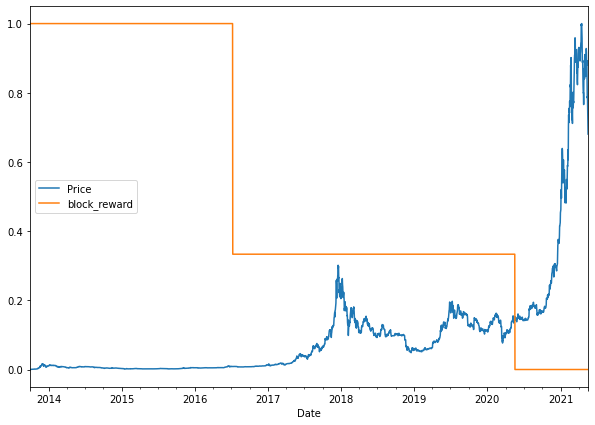

In [89]:
# Plotting block reward vs price over time
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(
    minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
    columns=bitcoin_prices_block.columns,
    index=bitcoin_prices_block.index
)
scaled_price_block_df.plot(figsize=(10, 7))

### Creating windowed multi-variate dataset with pandas

In [90]:
# Setting up hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [91]:
# Making a copy of Bitcoin dataset
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Adding windowed column
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i + 1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [92]:
# Creating X (windows) and y (horizon)
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

X.head(), y.head()

(            block_reward     Price+1     Price+2     Price+3     Price+4  \
 Date                                                                       
 2013-10-08          25.0  121.794998  120.655327  121.338661  118.674660   
 2013-10-09          25.0  123.032997  121.794998  120.655327  121.338661   
 2013-10-10          25.0  124.049004  123.032997  121.794998  120.655327   
 2013-10-11          25.0  125.961159  124.049004  123.032997  121.794998   
 2013-10-12          25.0  125.279663  125.961159  124.049004  123.032997   
 
                Price+5     Price+6     Price+7  
 Date                                            
 2013-10-08  108.584831  125.455002  123.654991  
 2013-10-09  118.674660  108.584831  125.455002  
 2013-10-10  121.338661  118.674660  108.584831  
 2013-10-11  120.655327  121.338661  118.674660  
 2013-10-12  121.794998  120.655327  121.338661  ,
 Date
 2013-10-08    123.032997
 2013-10-09    124.049004
 2013-10-10    125.961159
 2013-10-11    125.27966

In [93]:
# Making train and test sets, using indexing
split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

### Model 6 - Dense (multivariate time series)

In [94]:
# Making miultivariate tiem series model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compiling the model
model_6.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_6 = model_6.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    verbose=1,
    validation_data=(X_test, y_test),
    callbacks=[create_model_checkpoint(model_name=model_6.name)]
)

Epoch 1/100
10/18 [===============>..............] - ETA: 0s - loss: 1877.4817 INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 3s 92ms/step - loss: 1271.8297 - val_loss: 2087.3906
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 360.3777INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 81ms/step - loss: 337.5563 - val_loss: 1783.6649
Epoch 3/100
 9/18 [==============>...............] - ETA: 0s - loss: 220.4687INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 77ms/step - loss: 215.4244 - val_loss: 1266.9431
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 191.2953INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 76ms/step - loss: 190.3177 - val_loss: 1031.1313
Epoch 5/100
15/18 [========================>.....] - ETA: 0s - loss: 185.7090INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 66ms/step - loss: 180.5268 - val_loss: 1014.7656
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 172.7290INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 63ms/step - loss: 174.4778 - val_loss: 962.3682
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 167.9365INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 60ms/step - loss: 167.1833 - val_loss: 920.5300
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 159.3998INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 58ms/step - loss: 161.3657 - val_loss: 883.6695
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 157.9078 - val_loss: 887.3111
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 151.0211INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 52ms/step - loss: 152.8680 - val_loss: 841.4356
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 147.6895INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 57ms/step - loss: 146.8516 - val_loss: 809.0340
Epoch 12/100
13/18 [====================>.........] - ETA: 0s - loss: 142.8057INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 62ms/step - loss: 142.9264 - val_loss: 806.0526
Epoch 13/100
18/18 [==============================] - 0s 9ms/step - loss: 141.1741 - val_loss: 865.6666
Epoch 14/100
18/18 [==============================] - 0s 12ms/step - loss: 137.7900 - val_loss: 818.3352
Epoch 15/100
13/18 [====================>.........] - ETA: 0s - loss: 133.3733INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 84ms/step - loss: 135.2393 - val_loss: 750.4307
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 130.4197INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 58ms/step - loss: 130.4197 - val_loss: 746.9639
Epoch 17/100
13/18 [====================>.........] - ETA: 0s - loss: 129.4212INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 65ms/step - loss: 127.9111 - val_loss: 743.5341
Epoch 18/100
 8/18 [============>.................] - ETA: 0s - loss: 138.4788INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 65ms/step - loss: 126.1108 - val_loss: 698.6935
Epoch 19/100
18/18 [==============================] - 0s 10ms/step - loss: 123.4349 - val_loss: 723.9496
Epoch 20/100
12/18 [===================>..........] - ETA: 0s - loss: 124.5457INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 54ms/step - loss: 122.2465 - val_loss: 693.1622
Epoch 21/100
14/18 [======================>.......] - ETA: 0s - loss: 125.3025INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 72ms/step - loss: 124.9247 - val_loss: 665.0708
Epoch 22/100
15/18 [========================>.....] - ETA: 0s - loss: 123.1573INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 63ms/step - loss: 119.3752 - val_loss: 664.4453
Epoch 23/100
12/18 [===================>..........] - ETA: 0s - loss: 118.2526INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 63ms/step - loss: 122.7817 - val_loss: 664.2415
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 120.7711INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 55ms/step - loss: 120.7711 - val_loss: 633.9146
Epoch 25/100
13/18 [====================>.........] - ETA: 0s - loss: 119.8707INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 61ms/step - loss: 116.4304 - val_loss: 629.0275
Epoch 26/100
15/18 [========================>.....] - ETA: 0s - loss: 120.3167INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 66ms/step - loss: 117.2316 - val_loss: 622.0745
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 117.9490INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 46ms/step - loss: 118.2185 - val_loss: 616.7946
Epoch 28/100
16/18 [=========================>....] - ETA: 0s - loss: 113.4979INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 49ms/step - loss: 114.2431 - val_loss: 611.7462
Epoch 29/100
16/18 [=========================>....] - ETA: 0s - loss: 113.2837INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 62ms/step - loss: 114.0633 - val_loss: 608.8645
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 117.3781INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 74ms/step - loss: 116.7299 - val_loss: 604.1967
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 113.4331 - val_loss: 608.6072
Epoch 32/100
18/18 [==============================] - 0s 7ms/step - loss: 111.7499 - val_loss: 607.2433
Epoch 33/100
18/18 [==============================] - 0s 8ms/step - loss: 113.1139 - val_loss: 640.8706
Epoch 34/100
15/18 [========================>.....] - ETA: 0s - loss: 112.4644INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 103ms/step - loss: 113.1654 - val_loss: 602.0913
Epoch 35/100
12/18 [===================>..........] - ETA: 0s - loss: 112.7352INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 116ms/step - loss: 111.1450 - val_loss: 595.8406
Epoch 36/100
18/18 [==============================] - ETA: 0s - loss: 114.4181INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 120ms/step - loss: 114.4181 - val_loss: 590.8555
Epoch 37/100
17/18 [===========================>..] - ETA: 0s - loss: 111.0758INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 121ms/step - loss: 111.8181 - val_loss: 588.6091
Epoch 38/100
14/18 [======================>.......] - ETA: 0s - loss: 115.3466INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 100ms/step - loss: 112.1112 - val_loss: 586.9124
Epoch 39/100
18/18 [==============================] - 0s 10ms/step - loss: 112.5515 - val_loss: 603.3849
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 103.9430INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 67ms/step - loss: 110.7114 - val_loss: 583.8201
Epoch 41/100
18/18 [==============================] - 0s 8ms/step - loss: 112.0576 - val_loss: 652.3966
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 116.7515 - val_loss: 585.8173
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 112.5799 - val_loss: 621.1279
Epoch 44/100
18/18 [==============================] - 0s 8ms/step - loss: 114.5006 - val_loss: 613.3313
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 111.0219 - val_loss: 602.0560
Epoch 46/100
12/18 [===================>..........] - ETA: 0s - loss: 114.8265INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 89ms/step - loss: 110.7977 - val_loss: 583.4967
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 110.7211 - val_loss: 664.1302
Epoch 48/100
18/18 [==============================] - 0s 10ms/step - loss: 108.8282 - val_loss: 608.0532
Epoch 49/100
 9/18 [==============>...............] - ETA: 0s - loss: 120.4419INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 70ms/step - loss: 112.1275 - val_loss: 582.6066
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 108.3285 - val_loss: 615.4805
Epoch 51/100
15/18 [========================>.....] - ETA: 0s - loss: 108.1901INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 81ms/step - loss: 108.3824 - val_loss: 577.7164
Epoch 52/100
18/18 [==============================] - 0s 9ms/step - loss: 110.0310 - val_loss: 582.2988
Epoch 53/100
18/18 [==============================] - 0s 8ms/step - loss: 109.4493 - val_loss: 585.7081
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 107.4977 - val_loss: 580.1633
Epoch 55/100
18/18 [==============================] - 0s 7ms/step - loss: 108.4192 - val_loss: 582.6334
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2744 - val_loss: 792.7254
Epoch 57/100
18/18 [==============================] - 0s 9ms/step - loss: 132.9475 - val_loss: 715.9135
Epoch 58/100
18/18 [==============================] - ETA: 0s - loss: 114.5500INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 76ms/step - loss: 114.5500 - val_loss: 575.1212
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 107.8620 - val_loss: 586.2362
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 107.0365 - val_loss: 577.0679
Epoch 61/100
18/18 [==============================] - ETA: 0s - loss: 107.0576INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 78ms/step - loss: 107.0576 - val_loss: 572.3975
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 106.2982 - val_loss: 577.8615
Epoch 63/100
18/18 [==============================] - 0s 8ms/step - loss: 110.2116 - val_loss: 656.6059
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 110.8885 - val_loss: 604.1472
Epoch 65/100
16/18 [=========================>....] - ETA: 0s - loss: 108.2306INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 80ms/step - loss: 108.7302 - val_loss: 569.8525
Epoch 66/100
15/18 [========================>.....] - ETA: 0s - loss: 106.7817INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 75ms/step - loss: 106.3709 - val_loss: 569.0615
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 106.2986 - val_loss: 626.3527
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 114.5972 - val_loss: 693.1104
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 124.3247 - val_loss: 622.2064
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 125.3168 - val_loss: 587.6537
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 110.2790 - val_loss: 592.9962
Epoch 72/100
17/18 [===========================>..] - ETA: 0s - loss: 105.3111INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 83ms/step - loss: 107.1508 - val_loss: 568.7042
Epoch 73/100
18/18 [==============================] - 0s 10ms/step - loss: 109.3503 - val_loss: 576.8884
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 108.5523 - val_loss: 568.7136
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 106.4679 - val_loss: 579.0500
Epoch 76/100
18/18 [==============================] - 0s 8ms/step - loss: 107.9788 - val_loss: 571.3451
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 106.9047 - val_loss: 571.2097
Epoch 78/100
17/18 [===========================>..] - ETA: 0s - loss: 107.9041INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 74ms/step - loss: 106.8595 - val_loss: 568.3872
Epoch 79/100
18/18 [==============================] - 0s 12ms/step - loss: 105.8198 - val_loss: 608.8751
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 108.0809 - val_loss: 578.4296
Epoch 81/100
16/18 [=========================>....] - ETA: 0s - loss: 105.7820INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 65ms/step - loss: 105.8616 - val_loss: 567.1210
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 117.0810 - val_loss: 612.5519
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 108.7093 - val_loss: 647.8658
Epoch 84/100
18/18 [==============================] - 0s 8ms/step - loss: 110.7098 - val_loss: 574.1594
Epoch 85/100
16/18 [=========================>....] - ETA: 0s - loss: 106.5116INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 73ms/step - loss: 107.3531 - val_loss: 566.5840
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 105.7355 - val_loss: 571.2017
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 105.7578 - val_loss: 602.1671
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 106.9564 - val_loss: 570.2495
Epoch 89/100
18/18 [==============================] - ETA: 0s - loss: 105.5294INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 64ms/step - loss: 105.5294 - val_loss: 565.6367
Epoch 90/100
18/18 [==============================] - 0s 8ms/step - loss: 104.9901 - val_loss: 573.1746
Epoch 91/100
16/18 [=========================>....] - ETA: 0s - loss: 106.3012INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 76ms/step - loss: 107.9334 - val_loss: 565.4147
Epoch 92/100
18/18 [==============================] - 0s 7ms/step - loss: 112.4461 - val_loss: 597.5071
Epoch 93/100
18/18 [==============================] - 0s 10ms/step - loss: 113.9389 - val_loss: 600.5096
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7475 - val_loss: 580.8244
Epoch 95/100
18/18 [==============================] - 0s 7ms/step - loss: 106.1216 - val_loss: 569.8229
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 106.4391 - val_loss: 595.9916
Epoch 97/100
18/18 [==============================] - 0s 11ms/step - loss: 107.0565 - val_loss: 575.5760
Epoch 98/100
18/18 [==============================] - 0s 9ms/step - loss: 106.4157 - val_loss: 565.5933
Epoch 99/100
18/18 [==============================] - 0s 10ms/step - loss: 107.0036 - val_loss: 565.4160
Epoch 100/100
18/18 [==============================] - 0s 8ms/step - loss

In [95]:
# Ecaluating the model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 637.7571


637.757080078125

In [96]:
# Loading the best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate/")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 565.4147


565.4146728515625

In [97]:
# Making predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8859.649 , 8773.65  , 9013.483 , 8778.196 , 8731.942 , 8723.261 ,
       8686.7295, 8513.542 , 8452.51  , 8519.831 ], dtype=float32)>

In [98]:
# Evaluate predictions
model_6_results = evaluate_preds(
    y_true=y_test,
    y_pred=model_6_preds
)
model_6_results

{'mae': 565.41455,
 'mse': 1164746.5,
 'rmse': 1079.2343,
 'mape': 2.5356278,
 'mase': 0.9932768}